
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
>I am going deep analyzing the data to track the main reason for not showing trying to know What factors are
important for us to know in order to predict if a patient will show up for their scheduled appointment?
>
>The following questions will be answered:
>
>1-Is age besides gender or any other feature related to the no-show?
>
>2-What is the effect of the neighborhood?
>
>3-What is the effect of the appointment day?
>
>4-What is the effect of the gap time?

<a id='wrangling'></a>
## Data Wrangling

### Asessing Data

In [250]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

# Loading data and printing out a few lines. 
df = pd.read_csv('Medical_No Shows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [251]:
# Getting the dataset information  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data has 110527 rows and 14 columns


Data types are okay except for the ScheduledDay and AppointmentDay that should be converted into datetime, Also PatientId and AppointmentID need to be converted into strings.

Column names need to be standarized 

In [252]:
# Checking for null values and duplicates
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It is clear that data has no null values

In [253]:
# Checking for duplicate rows
df.duplicated().sum()

0

It is clear that data has no toataly duplicate rows

In [254]:
# checking for duplicated appointmments for the same patient  
df[['PatientId', 'AppointmentDay']].duplicated().sum()

8719

This should be removed because the patient can not show and not show at the the same time! 

In [255]:
# Exploring unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [256]:
# unique values of Handcap 
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

It seems there are 5 grades for the handcap

In [257]:
# getting some statistical info
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age value is -1, it should be cleaned

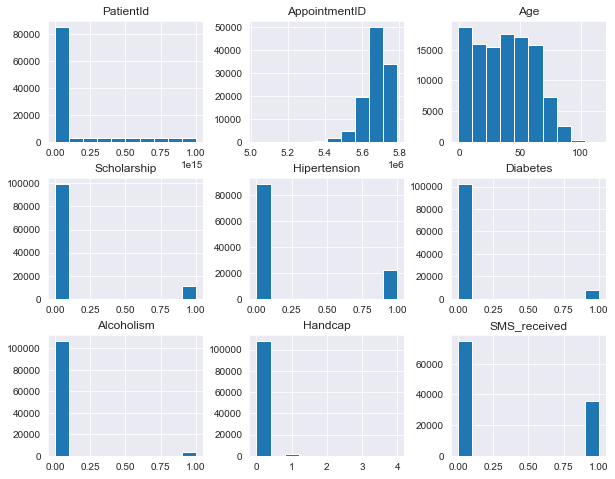

In [258]:
# visulizing data 
df.hist(figsize= (10,8));

In [259]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


It seems that there is a correlation between hipertension and age and between hipertension and diabetes 

### Cleaning Data

We need to do the next cleaning steps: 

    Renaming the columns with a standard style

    Replacing the rows of ages less than 0 

    Reducing the grades of the handcaps into two grades 

    Dropping the duplicated appointmments for the same patient

    Fixing the data types of day and the ID columns 


In [260]:
# getting the column names 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [261]:
# Renaming the columns with a standard style
columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_date', 'appointment_date', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes','alcoholism', 'handcap','sms_received','no_show']
df.columns = columns

In [262]:
# checking for renaming 
df.head(0)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [263]:
# number of wrong age values 
df.query('age<=0').age.count()

3540

In [266]:
# Replacing the wrong rows of ages with the mean age 
mean_age = df.age.mean()
df['age']= df['age'].mask(df.age<=0,mean_age)

In [267]:
#checking for wrong_ages 
df.query('age<=0').age.count()

0

In [268]:
# Reducing the grades of the handcaps into two grades 
df['handcap']= df['handcap'].mask(df.handcap > 1, 1)

In [269]:
# checking for change 
df.handcap.value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

In [270]:
# Changing the data types of the ID columns into str
df.patient_id = df.patient_id.astype(str)
df.appointment_id = df.appointment_id.astype(str)

In [271]:
# Changing the data types of day columns into datetime 
df.scheduled_date = pd.to_datetime(df.scheduled_date)
df.appointment_date = pd.to_datetime(df.appointment_date)

In [272]:
#checking 
df.dtypes 

patient_id                       object
appointment_id                   object
gender                           object
scheduled_date      datetime64[ns, UTC]
appointment_date    datetime64[ns, UTC]
age                             float64
neighbourhood                    object
scholarship                       int64
hipertension                      int64
diabetes                          int64
alcoholism                        int64
handcap                           int64
sms_received                      int64
no_show                          object
dtype: object

In [275]:
# Dropping duplicated appointmments for the same patient  
duplicated_appointmments = df[['patient_id', 'appointment_date']].duplicated()
df.drop_duplicates(['patient_id','appointment_date'], keep='last' , inplace=True)

In [276]:
#checking 
duplicated_appointmments.sum()

0

In [277]:
# Explore the data
df.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes


It will be usefel if we added new columns like appointment_day, time_gap (the difference between the scheduled_date and the appointment_date)

In [278]:
# Extractig only the dates from date columns 
df['appointment_date'] = df['appointment_date'].dt.date 
df['scheduled_date'] = df['scheduled_date'].dt.date

df.head() #checking 

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661.0,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123.0,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes


In [279]:
# Adding the two new columns 
df['appointment_day'] = df[['appointment_date']].apply(lambda x: dt.datetime.strftime(x['appointment_date'], '%A'), axis=1)
df['time_gap'] = df ['appointment_date'] - df['scheduled_date']
df['time_gap'] = df['time_gap'].dt.days
df.head() #checking 

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day,time_gap
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0
5,95985133231274.0,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,No,Friday,2
6,733688164476661.0,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,2
7,3449833394123.0,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,2


In [280]:
# check for minus time gaps 
minus_time_gap = df.query('time_gap < 0')
minus_time_gap

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day,time_gap
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38.0,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22.0,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7.0,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1


In [281]:
# removing minus time gaps 
df.drop(minus_time_gap.index, inplace= True)

In [282]:
# checking
minus_time_gap = df.query('time_gap < 0')
minus_time_gap

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day,time_gap


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Is age besides gender or any other feature related to the no show?)

In [283]:
# Get only the absent patients in wiche we are interested
df_absent = df.query('no_show == "Yes"')

Text(0, 0.5, 'Frequency')

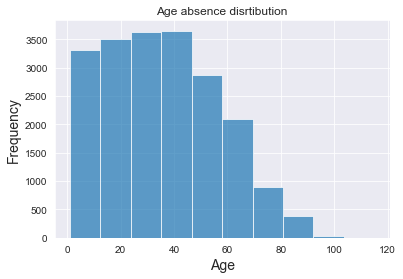

In [284]:
# Age distribution of absence 
df_absent.age.plot(kind = 'hist', title = 'Age absence disrtibution', alpha=.7);
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)

In [285]:
# Get the median of the age 
df_absent.age.median()

35.0

The relation between age of patients and their absence in not yet clear, lets make sure


In [286]:
# get the elder and not elder groups of patients 
old_absent= df_absent.query('age >= 35.0 ')
young_absent=df_absent.query('age < 35.0 ')                

In [287]:
# lets explore the effect of the gender
old_gender_counts = old_absent.groupby(['gender']).gender.count()
young_gender_counts = young_absent.groupby(['gender']).gender.count()
old_gender_counts, young_gender_counts

(gender
 F    6950
 M    3246
 Name: gender, dtype: int64,
 gender
 F    6469
 M    3723
 Name: gender, dtype: int64)

Almost equal numbers! it seems that there is no direct relation of absence between age and gender 

In [295]:
# creaing a function that plots the relation between absence and different features  
def plotting(df_absent, column_name, labels=['','']):
    ''' 
    Input data: Absence DataFrame, the fearture, x_label of the plots
    Output: two figures
        1-the relation between absence and the feature
        2-effect of age 
    '''
    # checking the relation between absence and other features
    df_column = df_absent[column_name]
    df_column_hist= plt.hist(df_column)
    locations = [0, 1]
    width = 0.35
    labels = labels 
    plt.ylabel('Number of absent cases', fontsize= 14)
    plt.xticks(locations, labels)
    
    # checking effect of age on the feature 
    old_absent_cloumn = old_absent[column_name].value_counts()
    young_absent_cloumn = young_absent[column_name].value_counts()
    
    labels = labels 
    without_bar_values = [old_absent_cloumn[0], young_absent_cloumn[0]]
    with_bar_values = [old_absent_cloumn[1], young_absent_cloumn[1]]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()

    rects1 = plt.bar(x - width/2, without_bar_values, width, label='old')
    rects2 = plt.bar(x + width/2, with_bar_values, width, label='young')

    ax.set_ylabel('Number of absent cases', fontsize= 14)
    ax.set_title('Absence by age and {}'.format(column_name),size=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show();
    
    return df_column_hist, rects1, rects2

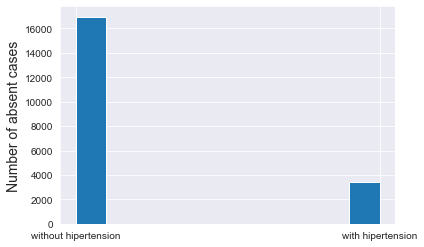

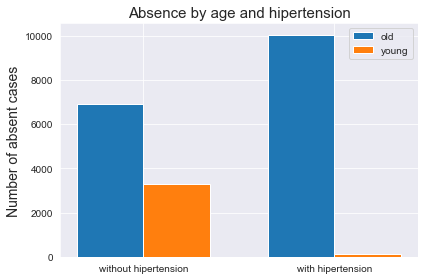

In [296]:
# Hipertension and age effect on absence 
plotting(df_absent, 'hipertension', labels=['without hipertension','with hipertension']);

There is no great relation between hipertnesion and absence, less people with hipertnesion were absent but most of them were old. 

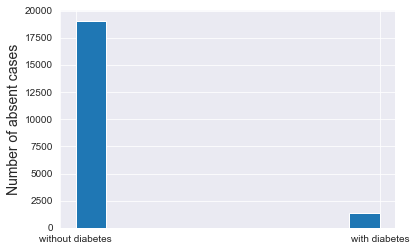

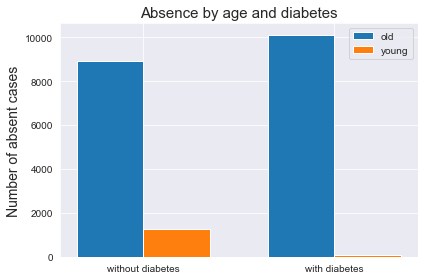

In [297]:
# Hipertension and age effect on absence 
plotting(df_absent, 'diabetes', labels=['without diabetes','with diabetes']);

Diabetes has no relation to absence

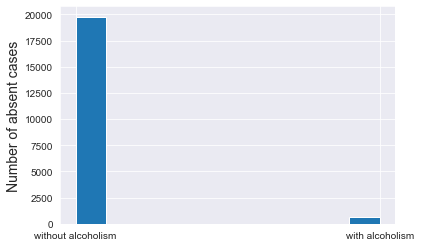

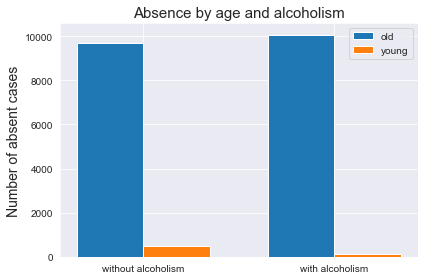

In [298]:
# Hipertension and age effect on absence 
plotting(df_absent, 'alcoholism', labels=['without alcoholism','with alcoholism']);

Alcoholism has no relation to absence

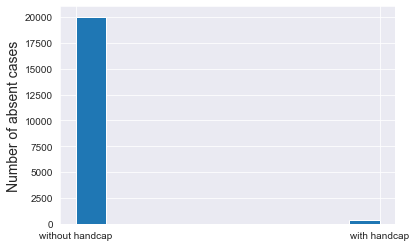

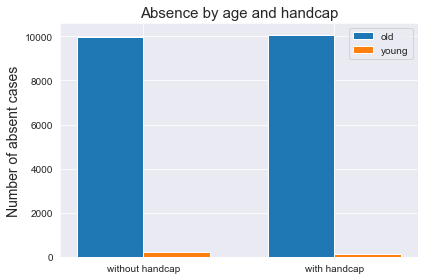

In [165]:
# Hipertension and age effect on absence 
plotting(df_absent, 'handcap', labels=['without handcap','with handcap']);

Handcap has no relation to absence

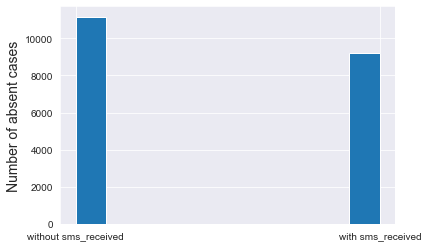

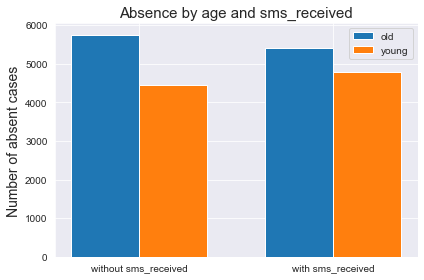

In [299]:
# Hipertension and age effect on absence 
plotting(df_absent, 'sms_received', labels=['without sms_received','with sms_received']);

Alot of patients (old and young) who received sms were absent!

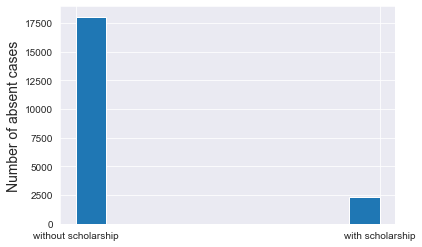

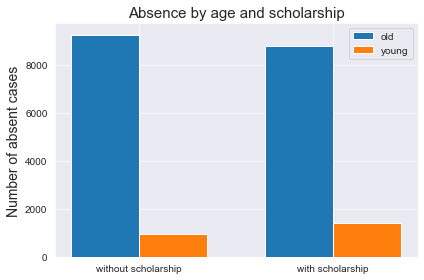

In [300]:
# scholarship and age effect on absence 
plotting(df_absent, 'scholarship', labels=['without scholarship','with scholarship']);

Most of absents have no scholarships and most of them wrere old

### Research Question 2 (What is the effect of the neighbourhood?)

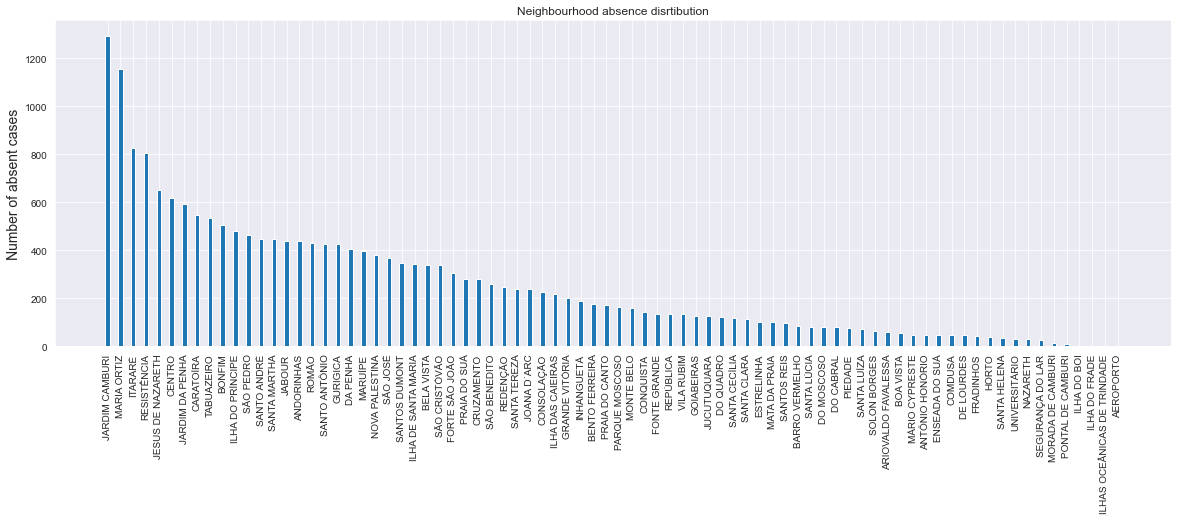

In [301]:
df_column = df_absent['neighbourhood'].value_counts()
plt.figure(figsize=(20,6))
plt.bar(df_column.index, df_column.values, width=.35)
plt.ylabel('Number of absent cases', fontsize= 14)
plt.title('Neighbourhood absence disrtibution')
plt.xticks(rotation=90);

There is a limit here which is we don't know the distance between neighbourhood and hospitals, however the most two neighbourhood from which people wrere absent are JARDIM CAMBURI and MARIA ORTIX

### Research Question 3 (What is the effect of the appointment day?)

In [302]:
df_absent.appointment_day.value_counts()

Tuesday      4670
Wednesday    4649
Monday       4324
Friday       3661
Thursday     3076
Saturday        8
Name: appointment_day, dtype: int64

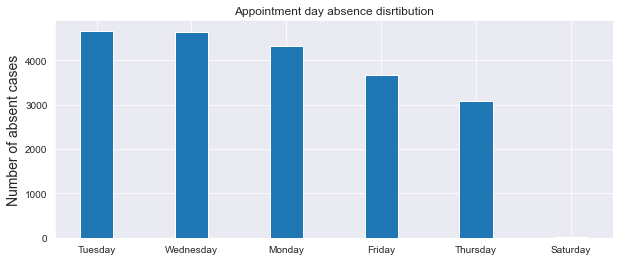

In [303]:
df_column = df_absent['appointment_day'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(df_column.index, df_column.values, width=.35)
plt.ylabel('Number of absent cases', fontsize= 14)
plt.title('Appointment day absence disrtibution');

Most of the absence cases were on the working days of the week, People in Brazil work form Mondy to Friday

### Research Question 4 (What is the effect of the gap time?)

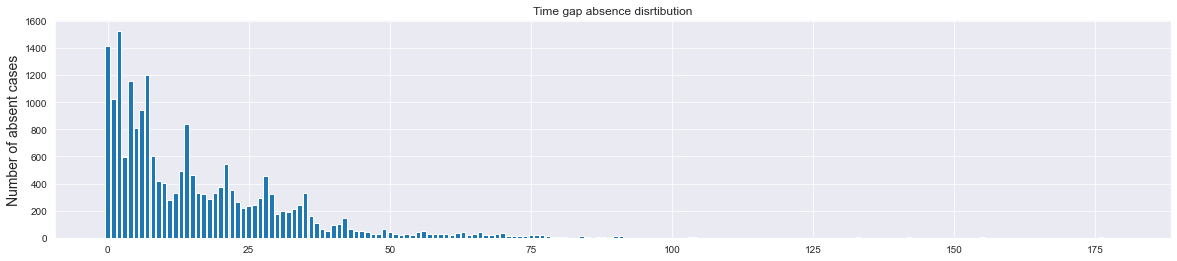

In [249]:
df_column = df_absent['time_gap'].value_counts()
plt.figure(figsize=(20,4))
plt.bar(df_column.index, df_column.values)
plt.ylabel('Number of absent cases', fontsize= 14)
plt.title('Time gap absence disrtibution');

The time gap between the appointment and scheduled dates may urge the patient to be absent ! 

<a id='conclusions'></a>
## Conclusions


### After analysis of the data we conculuded the next outcomes:

1-There is no direct relation of absence between age and gender.

2-There is no great relation between hypertension and absence, fewer people with hypertension were absent but most of them were old.

3-Diabetes and Handicap have no relation to absence.

4-A lot of patients (old and young) who received SMS were absent!

5-Most absents have no scholarships and most of them were old.

6-There is a limit here which is we don't know the distance between the neighborhood and hospitals, however, the most two neighborhoods from which people were absent are JARDIM CAMBURI and MARIA ORTIX.

7-Most of the absence cases were on the working days of the week, people in Brazil work from Mondy to Friday.

8-The time gap between the appointment and scheduled dates may urge the patient to be absent!

<a id='References'></a>
# References
[Grouped bar chart with labels](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)